In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("pre.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


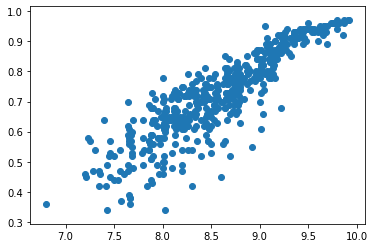

In [4]:
plt.scatter(data['CGPA'],data['Chance of Admit'])
plt.show()

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
X=data.iloc[:,1:8]
y=data.iloc[:,8]

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test =train_test_split(X ,y,test_size=.1, random_state=42)


In [9]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
72,321,111,5,5.0,5.0,9.45,1
182,299,100,2,3.0,3.5,7.88,0
131,303,105,5,5.0,4.5,8.65,0
410,301,96,1,3.0,4.0,7.56,0
193,336,118,5,4.5,5.0,9.53,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [10]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
predict=model.predict(X_test)

In [12]:
predict

array([0.91202347, 0.79908339, 0.56944077, 0.7094168 , 0.81284768,
       0.86121498, 0.4772096 , 0.65681357, 0.82350973, 0.80728853,
       0.72085214, 0.72705202, 0.65732647, 0.93470516, 0.82262732,
       0.51485337, 0.84070303, 0.6003117 , 0.53702198, 0.57529175,
       0.6631809 , 0.56239271, 0.72470225, 0.79098109, 0.77599102,
       0.60763477, 0.94796861, 0.84702323, 0.62634859, 0.74721373,
       0.56146682, 0.73039242, 0.54603282, 0.86107987, 0.65592875,
       0.73543182, 0.55523135, 0.95698385, 0.64696029, 0.70792458,
       0.96634243, 0.5771478 , 0.66957985, 0.85686553, 0.93993973,
       0.58245819, 0.95406713, 0.83767399, 0.79517762, 0.92684303])

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predict , y_test)

0.04542315262441814

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predict , y_test)

0.004606820638854415

In [16]:
mean_squared_error(predict , y_test)**.5

0.06787356362277153